In [ ]:
!pip install catboost

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**CatBoost Classifier Documentation link:** https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = CatBoostClassifier(random_state=RAND_SEED, verbose = 0)

# hyper-parameters

max_depth = [3,4,5]

n_estimators = list(range(50,300,10))

learning_rate = np.arange(.1 , 1 , .1).tolist()

# dictonary of all hyperparameters

param_grid = {'n_estimators': n_estimators , 'max_depth':max_depth , 'learning_rate': learning_rate}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = CatBoostClassifier

class_label = 'Rainfall'
x_axis_param_name = 'n_estimators'
x_axis_param_vals = n_estimators


## 1. Experimentation on the Weather Daily Dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')

### 1.0 No technique

In [6]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 270}
Train set performance: accuracy=0.7752, macro-f1=0.6011


Streaming output truncated to the last 5000 lines.
220:	learn: 0.3456113	total: 763ms	remaining: 238ms
221:	learn: 0.3450217	total: 766ms	remaining: 235ms
222:	learn: 0.3444610	total: 769ms	remaining: 231ms
223:	learn: 0.3440833	total: 772ms	remaining: 228ms
224:	learn: 0.3435581	total: 776ms	remaining: 224ms
225:	learn: 0.3430052	total: 779ms	remaining: 221ms
226:	learn: 0.3423773	total: 782ms	remaining: 217ms
227:	learn: 0.3421562	total: 785ms	remaining: 213ms
228:	learn: 0.3412427	total: 788ms	remaining: 210ms
229:	learn: 0.3409597	total: 791ms	remaining: 206ms
230:	learn: 0.3401840	total: 794ms	remaining: 203ms
231:	learn: 0.3399613	total: 797ms	remaining: 199ms
232:	learn: 0.3391403	total: 801ms	remaining: 196ms
233:	learn: 0.3387365	total: 804ms	remaining: 192ms
234:	learn: 0.3385007	total: 807ms	remaining: 189ms
235:	learn: 0.3382400	total: 810ms	remaining: 185ms
236:	learn: 0.3376225	total: 813ms	remaining: 182ms
237:	learn: 0.3375183	total: 816ms	remaining: 178ms
238:	learn: 0

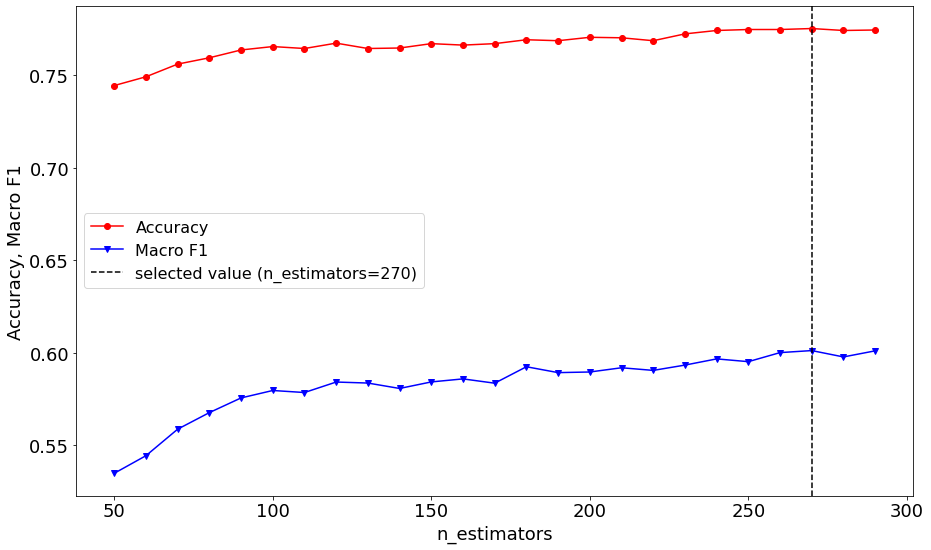

In [7]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [8]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7734, macro-f1=0.6017


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, class_label)

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [10]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 270}
Train set performance: accuracy=0.7771, macro-f1=0.6078


Streaming output truncated to the last 5000 lines.
220:	learn: 0.2434392	total: 707ms	remaining: 221ms
221:	learn: 0.2426746	total: 710ms	remaining: 217ms
222:	learn: 0.2422780	total: 713ms	remaining: 214ms
223:	learn: 0.2416557	total: 716ms	remaining: 211ms
224:	learn: 0.2408482	total: 719ms	remaining: 208ms
225:	learn: 0.2405714	total: 721ms	remaining: 204ms
226:	learn: 0.2400701	total: 724ms	remaining: 201ms
227:	learn: 0.2390145	total: 727ms	remaining: 198ms
228:	learn: 0.2382217	total: 730ms	remaining: 195ms
229:	learn: 0.2376309	total: 733ms	remaining: 191ms
230:	learn: 0.2374446	total: 736ms	remaining: 188ms
231:	learn: 0.2368414	total: 739ms	remaining: 185ms
232:	learn: 0.2360919	total: 742ms	remaining: 182ms
233:	learn: 0.2351111	total: 745ms	remaining: 178ms
234:	learn: 0.2347376	total: 748ms	remaining: 175ms
235:	learn: 0.2341746	total: 753ms	remaining: 172ms
236:	learn: 0.2339895	total: 762ms	remaining: 171ms
237:	learn: 0.2332203	total: 766ms	remaining: 167ms
238:	learn: 0

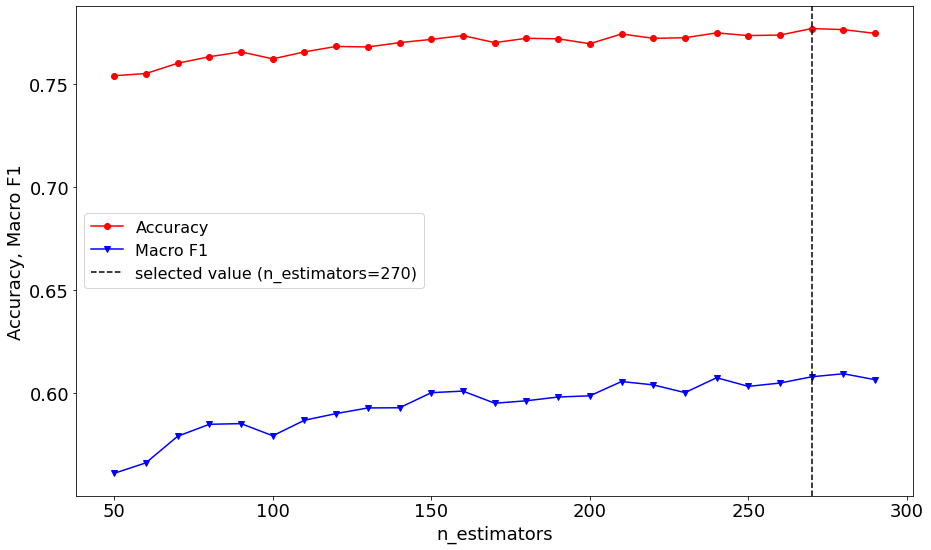

In [11]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7629, macro-f1=0.5939


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [13]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, class_label, is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Min Temp. (degree Celcius)']


In [14]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.30000000000000004, 'max_depth': 5, 'n_estimators': 230}
Train set performance: accuracy=0.7726, macro-f1=0.6056


Streaming output truncated to the last 5000 lines.
220:	learn: 0.3165956	total: 677ms	remaining: 211ms
221:	learn: 0.3159334	total: 680ms	remaining: 208ms
222:	learn: 0.3154363	total: 683ms	remaining: 205ms
223:	learn: 0.3146831	total: 686ms	remaining: 202ms
224:	learn: 0.3143843	total: 689ms	remaining: 199ms
225:	learn: 0.3137051	total: 692ms	remaining: 196ms
226:	learn: 0.3130971	total: 694ms	remaining: 193ms
227:	learn: 0.3123733	total: 697ms	remaining: 190ms
228:	learn: 0.3119811	total: 700ms	remaining: 186ms
229:	learn: 0.3116185	total: 702ms	remaining: 183ms
230:	learn: 0.3110292	total: 705ms	remaining: 180ms
231:	learn: 0.3104205	total: 708ms	remaining: 177ms
232:	learn: 0.3099297	total: 711ms	remaining: 174ms
233:	learn: 0.3092735	total: 714ms	remaining: 171ms
234:	learn: 0.3082810	total: 716ms	remaining: 168ms
235:	learn: 0.3080689	total: 719ms	remaining: 165ms
236:	learn: 0.3072505	total: 722ms	remaining: 161ms
237:	learn: 0.3069104	total: 725ms	remaining: 158ms
238:	learn: 0

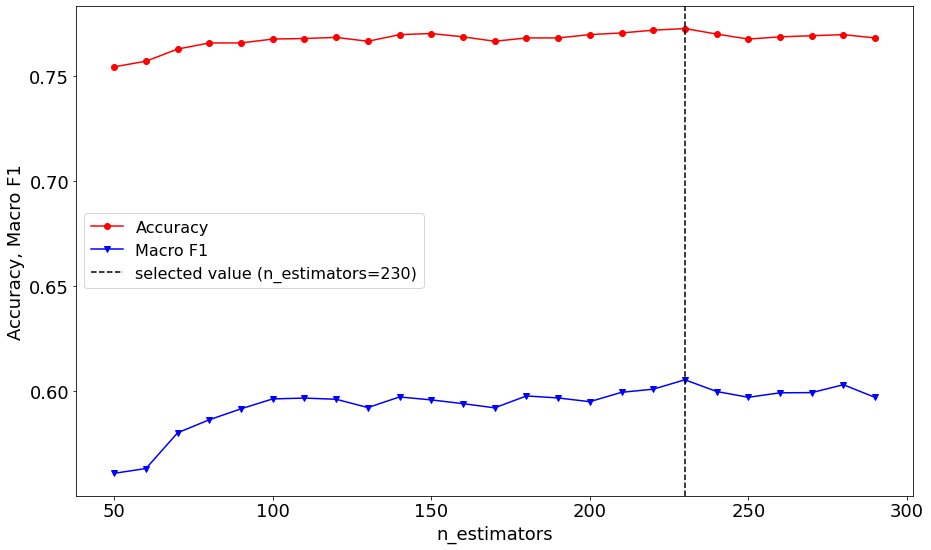

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [16]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7819, macro-f1=0.6392


### 1.3 SMOTE on Daily Dataset

In [17]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='smote')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {1: 2477, 0: 2477, 2: 2477}
Selected hyperparameters: {'learning_rate': 0.7000000000000001, 'max_depth': 5, 'n_estimators': 290}
Train set performance: accuracy=0.87, macro-f1=0.8695


Streaming output truncated to the last 5000 lines.
220:	learn: 0.1667716	total: 751ms	remaining: 235ms
221:	learn: 0.1659288	total: 755ms	remaining: 231ms
222:	learn: 0.1645016	total: 758ms	remaining: 228ms
223:	learn: 0.1638951	total: 761ms	remaining: 224ms
224:	learn: 0.1632691	total: 764ms	remaining: 221ms
225:	learn: 0.1629357	total: 767ms	remaining: 217ms
226:	learn: 0.1622915	total: 770ms	remaining: 214ms
227:	learn: 0.1619109	total: 773ms	remaining: 210ms
228:	learn: 0.1612071	total: 777ms	remaining: 207ms
229:	learn: 0.1605049	total: 780ms	remaining: 203ms
230:	learn: 0.1598704	total: 784ms	remaining: 200ms
231:	learn: 0.1594960	total: 793ms	remaining: 198ms
232:	learn: 0.1591301	total: 800ms	remaining: 196ms
233:	learn: 0.1583544	total: 803ms	remaining: 192ms
234:	learn: 0.1580830	total: 806ms	remaining: 189ms
235:	learn: 0.1572459	total: 811ms	remaining: 185ms
236:	learn: 0.1560793	total: 815ms	remaining: 182ms
237:	learn: 0.1557399	total: 819ms	remaining: 179ms
238:	learn: 0

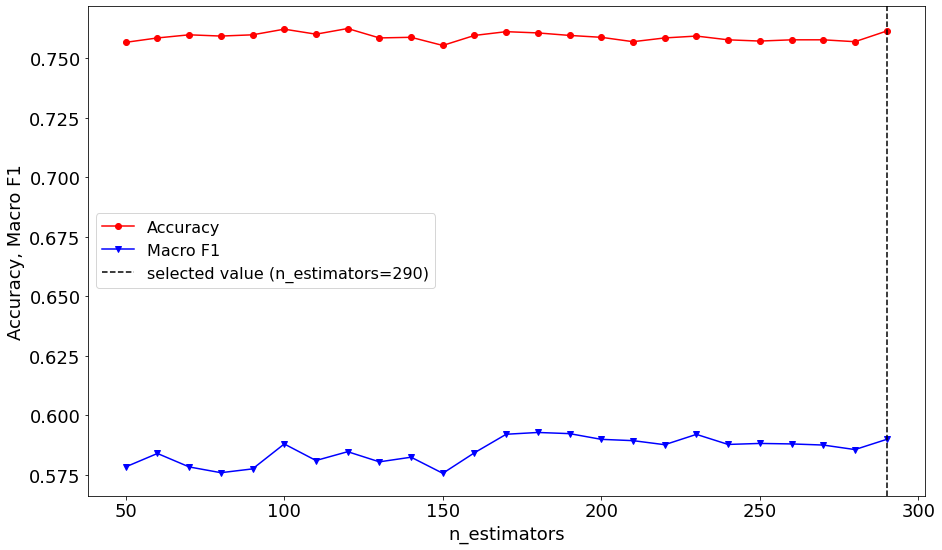

In [18]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [19]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7482, macro-f1=0.5975


### 1.4 Random Undersampling + SMOTE on Daily Dataset

In [20]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.7000000000000001, 'max_depth': 5, 'n_estimators': 290}
Train set performance: accuracy=0.844, macro-f1=0.8433


Streaming output truncated to the last 5000 lines.
220:	learn: 0.1667716	total: 757ms	remaining: 236ms
221:	learn: 0.1659288	total: 760ms	remaining: 233ms
222:	learn: 0.1645016	total: 763ms	remaining: 229ms
223:	learn: 0.1638951	total: 767ms	remaining: 226ms
224:	learn: 0.1632691	total: 770ms	remaining: 222ms
225:	learn: 0.1629357	total: 773ms	remaining: 219ms
226:	learn: 0.1622915	total: 776ms	remaining: 215ms
227:	learn: 0.1619109	total: 779ms	remaining: 212ms
228:	learn: 0.1612071	total: 782ms	remaining: 208ms
229:	learn: 0.1605049	total: 785ms	remaining: 205ms
230:	learn: 0.1598704	total: 788ms	remaining: 201ms
231:	learn: 0.1594960	total: 791ms	remaining: 198ms
232:	learn: 0.1591301	total: 794ms	remaining: 194ms
233:	learn: 0.1583544	total: 797ms	remaining: 191ms
234:	learn: 0.1580830	total: 800ms	remaining: 187ms
235:	learn: 0.1572459	total: 803ms	remaining: 184ms
236:	learn: 0.1560793	total: 806ms	remaining: 180ms
237:	learn: 0.1557399	total: 809ms	remaining: 177ms
238:	learn: 0

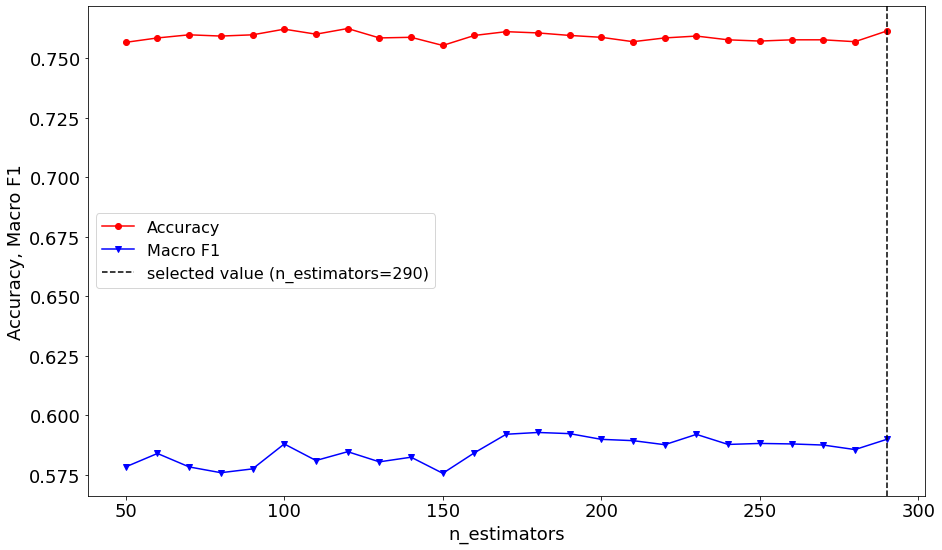

In [21]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [22]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7387, macro-f1=0.6022


### 1.5 Pearson Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [23]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 280}
Train set performance: accuracy=0.841, macro-f1=0.8397


Streaming output truncated to the last 5000 lines.
220:	learn: 0.1313812	total: 690ms	remaining: 216ms
221:	learn: 0.1310122	total: 693ms	remaining: 212ms
222:	learn: 0.1306426	total: 696ms	remaining: 209ms
223:	learn: 0.1295628	total: 699ms	remaining: 206ms
224:	learn: 0.1292223	total: 702ms	remaining: 203ms
225:	learn: 0.1288648	total: 705ms	remaining: 200ms
226:	learn: 0.1280213	total: 708ms	remaining: 196ms
227:	learn: 0.1272872	total: 711ms	remaining: 193ms
228:	learn: 0.1267409	total: 714ms	remaining: 190ms
229:	learn: 0.1259065	total: 716ms	remaining: 187ms
230:	learn: 0.1254833	total: 719ms	remaining: 184ms
231:	learn: 0.1250497	total: 722ms	remaining: 181ms
232:	learn: 0.1243278	total: 725ms	remaining: 177ms
233:	learn: 0.1238098	total: 728ms	remaining: 174ms
234:	learn: 0.1235456	total: 731ms	remaining: 171ms
235:	learn: 0.1231124	total: 734ms	remaining: 168ms
236:	learn: 0.1226058	total: 737ms	remaining: 165ms
237:	learn: 0.1220110	total: 740ms	remaining: 162ms
238:	learn: 0

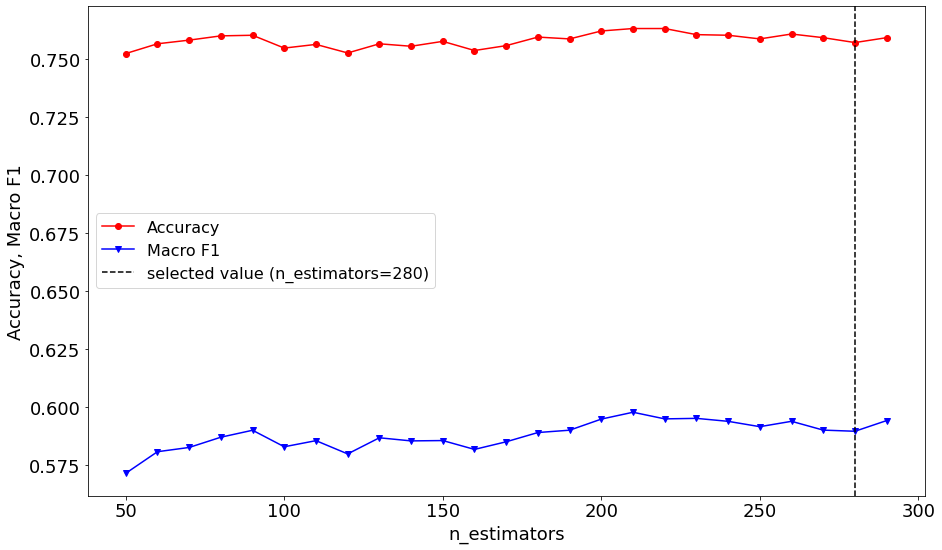

In [24]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [25]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7281, macro-f1=0.581


### 1.6 SelecKBest Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [26]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 290}
Train set performance: accuracy=0.8327, macro-f1=0.8317


Streaming output truncated to the last 5000 lines.
220:	learn: 0.2241453	total: 670ms	remaining: 209ms
221:	learn: 0.2237788	total: 673ms	remaining: 206ms
222:	learn: 0.2224853	total: 676ms	remaining: 203ms
223:	learn: 0.2219469	total: 678ms	remaining: 200ms
224:	learn: 0.2212984	total: 681ms	remaining: 197ms
225:	learn: 0.2207746	total: 684ms	remaining: 194ms
226:	learn: 0.2204441	total: 686ms	remaining: 190ms
227:	learn: 0.2198051	total: 689ms	remaining: 187ms
228:	learn: 0.2192521	total: 692ms	remaining: 184ms
229:	learn: 0.2185687	total: 694ms	remaining: 181ms
230:	learn: 0.2184790	total: 697ms	remaining: 178ms
231:	learn: 0.2179715	total: 701ms	remaining: 175ms
232:	learn: 0.2171558	total: 711ms	remaining: 174ms
233:	learn: 0.2167051	total: 715ms	remaining: 171ms
234:	learn: 0.2161368	total: 717ms	remaining: 168ms
235:	learn: 0.2155764	total: 720ms	remaining: 165ms
236:	learn: 0.2145207	total: 723ms	remaining: 162ms
237:	learn: 0.2139442	total: 725ms	remaining: 158ms
238:	learn: 0

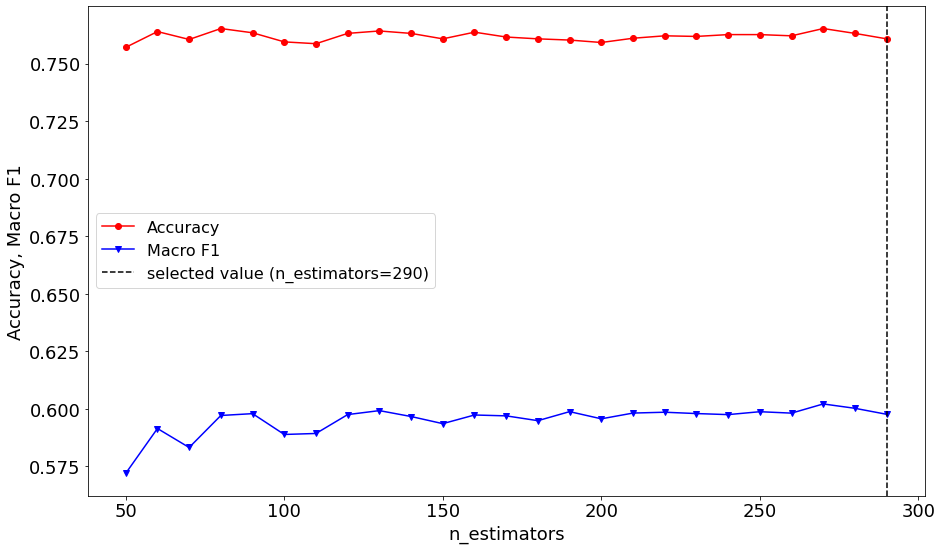

In [27]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [28]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7492, macro-f1=0.6182
